# Genetic Algorithm / 유전 알고리즘
*20190051 김강현*

---

This document was written in both **English and Korean**.<br>
이 문서는 **영어와 한국어**로 작성되었습니다.
> 
> Before diving into the reading, if you prefer to execute the algorithm upfront, you can select `Runtime > Run All` menu or use the shortcut `Ctrl/Command + F9`.<br>
> 읽기 전, 메뉴에서 `런타임 > 모두 실행`, 또는 단축키 `Ctrl/Command + F9`를 통해 알고리즘 실행 결과를 기다릴 필요 없이 확인할 수 있습니다.

**Table of Contents**

>[Genetic Algorithm / 유전 알고리즘](#scrollTo=pNjxE5DtKL_S)

>[Introduction / 소개](#scrollTo=15fdd13f)

>>[Problem: Scheduling all undergraduate courses at KAIST / 문제: KAIST 전체 학부 강의를 스케줄링 하기](#scrollTo=15fdd13f)

>[Data Examination / 데이터 살펴보기](#scrollTo=80cc2fc8)

>>[Selecting departments for which you wish to schedule / 어떤 학과의 강의를 스케줄링 할지 선택하기](#scrollTo=ORDI_8N_O-Ze)

>[Exploring Genetic Algorithms / 유전 알고리즘 살펴보기](#scrollTo=wuVlIT9zzP9F)

>>[Representing the result of scheduling as a chromosome / 스케줄링 결과를 염색체로 나타내기](#scrollTo=D-R0Q9yHbp1p)

>[Implementing the Algorithm / 알고리즘 구현](#scrollTo=z6j9InndMJCl)

>>[Implementation of the Fitness Function / 적합도 함수 구현](#scrollTo=dOmYFT4WedX3)

>>[Implementation of the Genetic Algorithm Function / 유전 알고리즘 함수 구현](#scrollTo=ZkrhTaTQjHv8)

>>>[The Conventional Method / 기존 방식](#scrollTo=ZkrhTaTQjHv8)

>>>[The Precision Search of the Maximum / Maximum 정밀 탐색](#scrollTo=ZkrhTaTQjHv8)

>>[Running the algorithm / 알고리즘 실행](#scrollTo=68f93a22)

>[Result / 결과](#scrollTo=7ae3ee4f)

>>[Printing out the Result / 결과 출력](#scrollTo=nHGe_PDdT5Cz)

>>[Visualizing the Result / 결과 시각화](#scrollTo=4aHshTzr4RRb)

>>[Interpretation of the Result / 결과 해석하기](#scrollTo=TPERrZy04a88)

>[Conclusion / 결론](#scrollTo=A_2bHje6cuOg)

>>[Reflection / 느낀점](#scrollTo=A_2bHje6cuOg)



# Introduction / 소개

The **Genetic Algorithm (GA)** is a metaheuristic that takes inspiration from the process of natural selection. They are widely employed to produce high-quality solutions for optimization and search problems. These algorithms accomplish their objectives by relying on bio-inspired operators such as mutation, crossover, and selections.<br>
**유전 알고리즘**은 자연 선택에서 영감을 받은 메타휴리스틱으로, 최적화 문제와 탐색 문제에 대한 좋은 솔루션을 찾기 위해 사용됩니다. 돌연변이, 교배, 선택 등의 생물학적 현상을 모방하는 방식으로 솔루션을 찾아냅니다.

In this notebook, we will explore the genetic algorithm and how it works by looking at how it can solve a real-life problem as described below:<br>
이 notebook에서는 실생활 문제 해결 예시를 통해 유전 알고리즘이 어떤 것이며, 어떻게 작동되는지를 살펴봅니다. 문제는 다음과 같습니다.

---
## Problem: Scheduling all undergraduate courses at KAIST / 문제: KAIST 전체 학부 강의를 스케줄링 하기

> "As an administrator of 10-year-long experience at KAIST, you're now in charge of **scheduling all undergraduate courses**. You have to decide at what time each course is offered on which days during the following semester. The course registration begins in 3 days, and you have to schedule all the courses and put them in the academic system database.<br>
> "10년차 KAIST 행정직인 당신은 이제 **카이스트 전체 학부 강의를 스케줄링**하는 업무를 맡게 되었습니다. 한 학기동안 어떤 과목이 어떤 요일, 어떤 시간에 진행되는지를 결정하는 업무입니다. 수강 신청 기간은 3일 후에 시작되고, 모든 강의를 그 전에 스케줄링 해서 학사 시스템의 데이터베이스에 입력해야 합니다.<br>
> <center><img src="https://raw.githubusercontent.com/KAIST19/CS376_project/main/KAIST_course_offered.png" alt="KAIST_course_offered.png" width="500px"></center><br>
> 
> These are available time slots. You just have to allocate each course to one of time slots listed below: <br>
> 다음은 강의 시간 목록입니다. 모든 강의들에게 강의 시간에 배정해주는 것이 이번 스케줄링 문제입니다.
>
> | Date | time |
> | ------- | ------------- |
> | Mon/Wed | 09:00–10:30, 10:30-12:00, 13:00-14:30, 14:30-16:00, 16:00-17:30 |
> | Tue/Thu | 09:00–10:30, 10:30-12:00, 13:00-14:30, 14:30-16:00, 16:00-17:30 |
>
> However, you can't just schedule as you please. If you assign courses for the same grade level, say, CS311, CS330, and CS376, to the same time slot, third-year students would be unable to enroll in any other classes except one. In particular, if overlapping occurs with required major subjects, many students may not be able to take these required courses on time, potentially delaying their graduation. You are in despair you cannot find a suitable algorithm that takes all these conditions into account for scheduling. <br>
> 그러나, 마음대로 스케줄링을 해서는 안됩니다. CS311, CS330, CS376과 같이 같은 학년의 강의들을 한 강의 시간에 배정해버리면 3학년 학생들은 한 강의를 제외한 나머지 강의들은 수강할 수 없게 됩니다. 또한, 전공 필수 과목의 경우 겹치는 경우가 생기게 되면 많은 학생들이 필수 과목을 제때 수강하지 못해 늦게 졸업하는 경우가 생길 수도 있습니다. 당신은 스케줄링을 위해 어떤 알고리즘을 써야할지 갈피를 잡지 못하고 있습니다.
>
> ***Oh, that's right!*** You remember learning about genetic algorithms in your AI course during your undergraduate years. You think that you can solve this problem with the genetic algorithm. You're now ready to solve the problem."<br>
> ***아 맞다!*** 학부때 AI 수업에서 배운 유전 알고리즘이 기억났습니다. 유전 알고리즘을 이용하면 이 문제를 해결할 수 있을 것 같습니다. 문제를 해결할 준비가 되었습니다."
---

# Importing Python Libraries / 파이썬 라이브러리 import하기

Please run the code below to import the libraries to continue.<br>
진행하기 전, 아래 코드를 실행하여 라이브러리를 import해주세요.

In [1]:
#@title [Code] Importing libraries

# Data management
import pandas as pd
import numpy as np
import copy

# Visualization
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Data Examination / 데이터 살펴보기

To get a sense of the data you'll be dealing with, let's first examine it. You can download the *course offered* data on the KAIST website—I uploaded it on my GitHub for convenience and used its link in the code. The data is stored in a csv file, and you can load it with pandas.<br>
어떤 데이터에 유전 알고리즘을 적용할지 살펴보기 위해, 먼저 데이터를 살펴보겠습니다. 데이터는 학사시스템에서 다운로드 받을 수 있으며, 편의를 위해 제 GitHub에 업로드해둔 파일을 사용합니다. csv 파일로 저장되어 있으며, pandas를 이용해 불러온 후 pandas.DataFrame에 저장합니다.

In [2]:
#@title [Code] Importing files

# Read the excel file and put the data into a dataframe
KAIST_courses = pd.read_excel('https://raw.githubusercontent.com/KAIST19/CS376_project/main/courses_offered.xls')

# Extract the headers from the first row and assign them as column names
headers = KAIST_courses.iloc[0]
KAIST_courses = pd.DataFrame(KAIST_courses.values[1:], columns=headers)

# Exclude thesis study, field practice, and individual study courses
exceptions = ['Thesis Study(Undergraduate)', 'Field Practice', 'Individual Study']
KAIST_courses = KAIST_courses[~(KAIST_courses['Course Type'].isin(exceptions))].groupby('Course No.', as_index=False).first()

# Fix the course number format by adding a space
def add_space(course_no):
    if course_no[2].isdigit():
        return course_no[:2] + ' ' + course_no[2:]
    else:
        return course_no
KAIST_courses['Course No.'] = KAIST_courses['Course No.'].apply(add_space)

# Print information about the imported courses
print("----------------------------------")
print("You imported %d courses." % len(KAIST_courses))
print("Headers:")
for header in headers:
    print(header, end=' | ')




----------------------------------
You imported 284 courses.
Headers:
year | term | Department | Course Type | Course No. | Course Code | Section | Course Title | Syllabus | AU | Lecture/Lab/Credits | Instructor | English | Edu4.0 Q | Limited class size | Class size(persons) | Class time | Classroom | Exam time | Remarks | Department code | Type of semester | Lecture Type | Hybrid(Simultaneous implementation of online and offline class: activate to sort column ascending) | 

You have 284 courses to schedule and they have many attributes (`Course No.`, `year`, `term`, ...). However, not all of them are important for scheduling. Here, we only take two of them into account:<br>
당신은 284개의 강의를 스케줄링 해야하며, 각 강의는 `Course No.`, `year`, `term` 등 많은 속성을 갖고 있습니다. 그러나, 모든 속성이 스케줄링에 고려가 될 필요는 없으며, 여기서 우리가 고려할 속성들은 다음과 같습니다.

---
- **`Course No.`** (CS101, HSS175, etc)
  - `Course No.` contains information about the department offering the course and the recommended grade level for enrollment.
  - e.g. CS204 is a course offered by the School of Computing and is recommended to be taken in the second year.
  - Courses offered by the same department or aimed at the same year of study are likely to attract the same group of students.
- **``Course type``** (major required, major elecive, etc)
  - Required courses: Students have to take all of them to graduate. Inefficient scheduling might delay students' graduation.
  - Elective courses: They have a lower priority than the required courses.
---
- **`Course No.`** (CS101, HSS175 등)
  - `Course No.`는 해당 강의를 개설하는 학과와 권장 수강 학년에 대한 정보를 포함하고 있습니다.
  - 예시: CS204는 전산학부 과목으로, 2학년 때 수강하는 것이 권장됩니다.
  - 따라서, 학과가 같거나 강의 번호의 첫 숫자가 같은 과목들은 같은 학생들이 들을 확률이 높습니다.
- **``Course type``** (전공 필수, 전공 선택 등)
  - 필수 과목들은 졸업하기 위해 필수적으로 들어야 하는 과목으로, 스케줄링이 잘못되면 학생들이 졸업을 제때 못하는 일이 발생할 수 있습니다.
  - 선택 과목들은 필수 과목들보다 스케줄링에 있어 낮은 priority를 가집니다.
---

## Selecting departments for which you wish to schedule / 어떤 학과의 강의를 스케줄링 할지 선택하기

Select the departments for which you wish to schedule courses. All departments are selected by default so you can skip this part if you wish to schedule all courses. If you want to speed up the process, select fewer departments and then click the 'Select departments' button. Remember, you can use the Shift and Ctrl (or Command) key to select multiple departments."<br>
어떤 학과의 강의들을 스케줄링할지 선택해주세요. 기본적으로 모든 학과들이 선택되어 있어서 모든 학과들의 강의를 스케줄링 하고 싶다면 넘어가도 되며, 빠른 알고리즘 실행을 원한다면 적은 수의 학과를 선택한 후 'Select departments' 버튼을 눌러주세요. Shift, Ctrl (또는 Command) 키로 복수의 학과를 선택할 수 있습니다.

If you wish to run the genetic algorithm again with a different set of departments later down the line, come back here and continue, please.<br>
만약 진행하던 중 다른 학과들의 강의들로 유전 알고리즘을 실행하고 싶다면, 여기로 돌아와 다시 진행하면 됩니다.

In [3]:
#@title [Code] Select departments

# List of department abbreviations
options = ['AE ', 'BCS', 'BS ', 'BTM', 'BiS', 'CBE', 'CE ', 'CH ', 'CS ', 'CTP', 'EE ', 'HSS', 'ID ', 'IE ', 'IP ', 'MAS', 'ME ', 'MS ', 'MSE', 'NQE', 'PH ', 'SS ', 'STP', 'TS ']

# Initialize selected_departments as the full list of departments
selected_departments = copy.deepcopy(options)

# Filter the KAIST_courses dataset to only include courses from the selected departments
courses = KAIST_courses[(KAIST_courses['Course No.'].str[:3].isin(selected_departments))]

# Print instructions for selection
print("Select the departments you want to make a timetable of.")
print("Multiple values can be selected with shift and/or ctrl (or command) pressed and mouse clicks or arrow keys.")
print("어떤 학과들의 강의들을 스케줄링 하시겠습니까?")
print("Shift키나 Ctrl (또는 command)를 사용하여 복수 선택할 수 있습니다.")

# Create a widget that allows multiple selection
checkboxes = widgets.SelectMultiple(
    options=options,
    rows=len(options),
    disabled=False
)

# Define a function to handle selection changes
def handle_selection(change):
    global selected_departments
    # Update the global variable selected_departments based on user selection
    selected_departments = list(change.new)

# Observe the widget for changes in selection
checkboxes.observe(handle_selection, names='value')

# Display the widget
display(checkboxes)

# Function to filter courses based on the selected departments
def filtering(button):
    global courses
    global departments
    # Update the courses to only include the selected departments
    courses = KAIST_courses[(KAIST_courses['Course No.'].str[:3].isin(selected_departments))]
    print(', '.join(selected_departments) + ' selected ({} courses)'.format(len(courses)))

# Create a button that runs the filtering function when clicked
button = widgets.Button(
    description='Select departments',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

# Attach the click event to the filtering function
button.on_click(filtering)

# Display the button
display(button)


Select the departments you want to make a timetable of.
Multiple values can be selected with shift and/or ctrl (or command) pressed and mouse clicks or arrow keys.
어떤 학과들의 강의들을 스케줄링 하시겠습니까?
Shift키나 Ctrl (또는 command)를 사용하여 복수 선택할 수 있습니다.


SelectMultiple(options=('AE ', 'BCS', 'BS ', 'BTM', 'BiS', 'CBE', 'CE ', 'CH ', 'CS ', 'CTP', 'EE ', 'HSS', 'I…

Button(description='Select departments', icon='check', style=ButtonStyle(), tooltip='click me')

# Exploring Genetic Algorithms / 유전 알고리즘 살펴보기

Before solving scheduling problems using genetic algorithms, let's briefly examine what a genetic algorithm is.<br>
유전 알고리즘을 사용해 스케줄링 문제를 해결하기 전, 유전 알고리즘이 어떤 알고리즘인지를 간단하게 살펴봅시다.

The genetic algorithm is executed through the following process.<br>
유전 알고리즘은 아래와 같은 과정을 통해 실행됩니다.
<center><img src="https://raw.githubusercontent.com/KAIST19/CS376_project/main/turtle.webp" alt="genetic_algorithm_steps" width="500px"></center><br>

1. **New generation**: The start of the process where an initial population is created. This population is usually generated randomly, providing a wide diversity of possible solutions. Each individual in this population represents a possible solution to the problem at hand. (In genetic algorithms, the individuals are referred to as '**chromosomes**')<br>**새로운 세대**: 모든 과정의 시작으로써, 초기 집단을 생성합니다. 초기 집단에는 다양한 해결책 탐색을 위해 여러 개체(염색체)들이 무작위로 생성되며, 각 염색체는 스케줄링 문제에 대한 하나의 해결책(solution)에 해당합니다.
2. **Evaluation of each individual**: This step involves assessing the quality of each chromosome in the current population, i.e., determining how well each solution solves the problem. This is done using a fitness function which is problem-specific.<br>**개체 평가**: 집단에 속한 염색체들의 적합도, 즉 각각의 해결책이 얼마나 '좋은' 해결책인지를 평가하는 과정입니다. 주어진 문제에 따라 정의된 적합도 함수를 사용하게 됩니다.
3. **Selection**: After the fitness of each chromosome has been evaluated, some form of selection occurs. This is where the genetic algorithm mimics the process of natural selection. The chromosomes with higher fitness have a greater chance of being selected for reproduction.<br> **선택**: 야생에서 일어나는 자연 선택과 마찬가지로, 적합도 함수를 통해 얻어낸 각 염색체의 적합도를 바탕으로, 살아남아서 번식할 염색체를 선택하는 과정입니다. 높은 적합도를 가진 일정 수의 염색체를 선택하고, 나머지는 버려집니다.
4. **Reproduction**: The selected chromosomes then reproduce to create the next generation of solutions. Reproduction often involves crossover (also called recombination), where pairs of chromosomes are selected from the current population, and parts of them are swapped to create new chromosomes. This is akin to genetic recombination in biology.<br>**번식**: 선택된 염색체들은 번식하여 다음 세대의 염색체들을 만들어냅니다. 번식의 방식으로 교차가 사용되는데, 두 염색체의 부분들을 적절히 섞어 새로운 유전자를 만드는 방식입니다. 이는 생물학적 교차와 비슷합니다.
5. **Mutation**: After reproduction, mutation occurs. This introduces small, random changes in the new chromosomes, helping to maintain diversity in the population and preventing premature convergence to a sub-optimal solution. This step is inspired by biological mutation, where random changes can occur in an organism's genetic material.<br> **변이**: 번식 후에는 변이가 발생합니다. 이것은 새 염색체에 작고 무작위 변화를 가하여 인구의 다양성을 유지하고 최적이 아닌 해결책에 이른 수렴을 방지하는데 도움이 됩니다. 이 단계는 생물학적 변이에서 영감을 받은 것입니다.

These five steps are then repeated for as many generations as necessary, ideally until a satisfactory solution has been found or a predetermined number of generations has been reached.<br>
이 다섯 가지 단계는 만족스러운 해결책을 찾거나 미리 정해진 세대 수에 도달할 때까지 필요한 만큼 반복됩니다.

## Representing the result of scheduling as a chromosome / 스케줄링 결과를 염색체로 나타내기

In order to solve the scheduling problem with the genetic algorithm, the result of scheduling should be represented as a chromosome. Consider scheduling the five courses below:<br>
유전 알고리즘을 통해 스케줄링을 하기 위해선, 각각의 스케줄링 결과를 염색체로 나타낼 필요가 있습니다. 다음 다섯 과목들을 스케줄링 하는 경우를 생각해봅시다.

| Course |
| :----: |
| CS101 |
| CS204 |
| CS311 |
| CS330 |
| CS376 |

First, index the time slots starting from 0.<br>
먼저, 수업 시간들을 0부터 인덱싱합니다.

| Date | time |
| :-----: | ------------- |
| Mon/Wed | 09:00–10:30 <font color="red">**(0)**</font>, 10:30-12:00 <font color="red">**(1)**</font>, 13:00-14:30 <font color="red">**(2)**</font>, 14:30-16:0 0<font color="red">**(3)**</font>, 16:00-17:30 <font color="red">**(4)**</font> |
| Tue/Thu | 09:00–10:30 <font color="red">**(5)**</font>, 10:30-12:00 <font color="red">**(6)**</font>, 13:00-14:30 <font color="red">**(7)**</font>, 14:30-16:00 <font color="red">**(8)**</font>, 16:00-17:30 <font color="red">**(9)**</font> |

Assign an integer from 0 to 9 to each course.<br>
각각의 과목에 0부터 9까지의 정수를 하나씩 부여합니다.

| Course | time slot |
| :----: | :-------: |
| CS101 | 1 |
| CS204 | 5 |
| CS311 | 2 |
| CS330 | 9 |
| CS376 | 9 |

The integer given to each course corresponds to when the course is. For example, CS101 takes place on Mondays and Wednesdays from 10:30 to 12:00."<br>
각각의 과목에게 부여된 정수는 수업 시간에 해당되게 됩니다. 예를 들어, CS101은 1을 부여받았으므로 CS101이 월요일과 수요일의 10:30-12:00에 수업이 진행됨을 의미합니다.

The list of the assigned integers is itself a chromosome. The courses have been scheduled by being given a list of integers [1, 5, 2, 9, 9].<br>
이렇게 부여한 정수들의 리스트가 곧 염색체입니다. 고정된 강의 리스트에 [1, 5, 2, 9, 9]라는 정수 리스트를 대응시킴으로서 강의들을 *스케줄링* 한 것입니다.

# Implementing the Algorithm / 알고리즘 구현

## Implementation of the Fitness Function / 적합도 함수 구현

As mentioned above, it's not desirable for required courses or courses of the same year to overlap. The fitness function, when it receives a chromosome as input, should return a high fitness for chromosomes that are judged to be properly scheduled.<br>
위에서 언급하였듯, 필수 과목들이 같은 시간에 열리거나, 같은 권장 수강 학년을 가진 과목들이 같은 시간에 열린다면, 이는 적합한 스케줄링의 결과가 아닙니다. 적합도 함수는 염색체를 입력으로 받았을 때, 적절하게 스케줄링되었다고 판단되는 염색체에게 높은 적합도를 리턴해야 합니다.

```python
def fitness_function(chromosome):
    # calculates the fitness of chromosome
    ...
    return fitness 
```

For this scheduling problem, `fitness` is negative. It starts with `fitness = 0`, and for each pair of two courses on the same time slot, if both are of similar years are at least one of them is a required course, fitness gets deducted. The details are below:<br>
이번 문제의 경우, `fitness`는 음의 값을 가집니다. `fitness = 0`으로부터 시작하며, 같은 수업 시간을 가진 모든 수업 쌍 (pair)에 대해 만약 학년이 비슷하거나 전공 필수인 과목이 존재한다면 `fitness`를 깎아내는 식으로 `fitness`를 계산합니다. 정확한 구현은 아래 코드에서 확인할 수 있습니다.


In [4]:
#@title [Code] The fitness function
def fitness_function(chromosome, course_type, course_no):
    ret = 0
    # for every pair in the same time slot,
    for i in range(len(chromosome) - 1):
        for j in range(i + 1, len(chromosome)):
            if chromosome[i] == chromosome[j]:
                # major courses being in the same time slot is not desirable
                if "required" in course_type[i] and "required" in course_type[j]:
                    major_penalty = 1
                elif "required" in course_type[i] or "required" in course_type[j]:
                    major_penalty = 0.7
                else:
                    major_penalty = 0.5

                # similar-level courses being in the same time slot is not desirable
                year_penalty = ((4 - abs(int(course_no[i][3]) - int(course_no[j][3]))) / 4)**2

                # ----------
                ret -= major_penalty * year_penalty

    return ret;

## Implementation of the Genetic Algorithm Function / 유전 알고리즘 함수 구현

Now it's time to implement the genetic algorithm function. It is the most important function that faithfully executes the genetic algorithm process introduced above.<br>
이제 유전 알고리즘 함수를 구현할 차례입니다. 위에서 소개한 유전 알고리즘 과정을 충실히 수행하는 가장 중요한 함수입니다.

The genetic algorithm function to be used in this scheduling is largely divided into two parts.<br>
이번 스케줄링에서 사용될 유전 알고리즘 함수는 크게 두 가지 부분으로 나뉩니다.

1. **The global search**.<br>**글로벌 탐색**
2. **The precision search of the maximum**<br>**Maximum 정밀 탐색**

### 1. The Global Search / 글로벌 탐색
The conventional genetic algorithm explained above. It generates a new generation by applying crossovers and mutations, and find a good solution through natural selection. If the fitness does not increase for 100 generations while the genetic algorithm is running, it is determined that it has almost reached a local maximum—which is hopefully the global maximum—and the process of creating a new generation through crossover is terminated. <br>
위에서 설명한 유전 알고리즘의 기존 방식입니다. 현재 세대에 교차 및 돌연변이를 시켜 새로운 세대를 얻어내며, 자연 선택을 통해 좋은 해를 찾아냅니다. 100 세대 동안 적합도가 증가하지 않았으면 local maximum(잘 실행된 경우 global maximum)에 근접했다고 판단하고, 아래에서 설명할 Maximum 정밀 탐색으로 넘어갑니다. 

### 2. The Precision Search of the Maximum / Maximum 정밀 탐색
(This is a process added ad hoc for this specific scheduling problem.)<br>
(이 스케줄링 문제를 위해 ad hoc으로 추가된 과정입니다.)

To reach the local maximum completely, all possible mutations of the chromosome with the highest fitness are generated, and the mutated chromosome with the highest fitness among these mutations is found. Then, all possible mutations of this mutated chromosome are generated again, and the chromosome with the highest fitness among these is found again, and this process is repeated. Eventually, there will come a time when there is no more change in fitness, at which point it is determined that the local maximum has been fully reached, and the entire process is terminated.<br>
Local maximum에 완전히 도달하기 위해서 현재 가장 적합도가 높은 염색체의 가능한 모든 돌연변이를 만들어내서, 그 돌연변이들 중 가장 적합도가 높은 염색체를 찾고, 이의 가능한 돌연변이를 다시 모두 만들어 내서 그둘 중 가장 적합도가 높은 염색체를 또 찾는, 이러한 작업을 반복합니다. 그러다 보면 적합도에 더이상 변화가 오지 않는 시점이 찾아올텐데, local maximum에 완전히 도달했다고 판단하고 모든 과정을 종료합니다.

This maximum precision search process complements the disadvantages of the genetic algorithm using the method of gradient descent. In the early stages, the genetic algorithm has a lower possibility of being trapped in a local maximum compared to gradient descent, which starts from one point. However, once it is near a maximum, gradient descent, which approaches the direction of the maximum point knowing it, has a higher probability of finding the exact maximum. In the case of the genetic algorithm, it must approach the maximum mainly depending on mutations. However, because the conventional mutation method searches sparsely around, it is difficult to find the maximum. Therefore, once it is judged that it has approached the maximum point through the conventional method, it adopts a method of moving to the mutation with the highest fitness among all possible mutations, as if gradient descent follows the gradient vector. At this time, in order to take a small step like gradient descent, it only produces mutations most similar to the chromosome with the highest fitness.<br>
이 Maximum 정밀 탐색 과정은 유전 알고리즘의 단점을 gradient descent의 방식으로 보완합니다. 초반에는 global한 탐색을 진행하는 유전 알고리즘이 한 점에서 시작하는 gradient descent보다 local maximum에 갇힐 가능성이 적으나, 어떤 maximum에 근접한 후에는 maximum point의 방향을 알고 접근하는 gradient descent보다 정확한 maximum을 찾을 확률이 더 낮습니다. 유전 알고리즘의 경우 주로 돌연변이에 의존하여 maximum에 접근해야 하는데, 기존 방식의 돌연변이는 주변을 sparse하게 탐색하기 때문에 maximum을 찾기에 무리가 있습니다. 따라서 기존 방식을 통해 maximum point에 접근했다고 판단이 되면, 마치 gradient descent가 gradient vector를 따라가는 것처럼 주위에 가능한 모든 돌연변이들을 생성한 후 그들 중 가장 높은 적합도를 가진 돌연변이로 옮겨가는 방식을 취하는 것입니다. 이때는 gradient descent처럼 작은 step을 취하기 위해서, 현재 가장 높은 적합도를 갖는 염색체와 거의 차이가 없는 돌연변이만을 만들어냅니다.

e.g. the most similar mutations of [3, 5, 4, 9] include [2, 5, 4, 9], [3, 6, 4, 9], and [3, 5, 4, 8].<br>
예) [3, 5, 4, 9]와 거의 차이가 없는 돌연변이: [2, 5, 4, 9], [3, 6, 4, 9], [3, 5, 4, 8] 등.

In [5]:
#@title [Code] The genetic algorithm function
def genetic_algorithm(dept, dept_courses):
    global courses

    # If there are no courses in the department, return an empty list
    if (dept_courses.shape[0] == 0):
        return []

    TOP_N = 20
    # Initialize course_type and course_no from dept_courses dataframe
    course_type = list(dept_courses['Course Type'])
    course_no = list(dept_courses['Course No.'])
    fitnesses = []

    # Initialize chromosomes
    chromosomes = [[0, np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], size=dept_courses.shape[0])] for _ in range(5000)]

    generation = 0
    while True:
        generation += 1
        new_chromosomes = []
        # Calculate fitness of all chromosomes
        for i in range(len(chromosomes)):
            chromosomes[i][0] = fitness_function(chromosomes[i][1], course_type, course_no)
        chromosomes.sort(key=lambda x: x[0], reverse=True)
        fitnesses.append(chromosomes[0][0])

        # If best chromosome fitness is zero, return chromosome
        if fitnesses[-1] == 0:
            return chromosomes[0][1]
        
        # Break out if fitness has not improved in the last 100 generations
        if generation > 100 and fitnesses[-1] == fitnesses[-100]:
            best_as_of_now = chromosomes[0][1]
            break

        # Add the best chromosomes of the current generation
        for i in range(TOP_N - 1):
            new_chromosomes.append([0, chromosomes[i][1]])
            
            # Generate new chromosomes through crossover and mutation
            for j in range(i + 1, TOP_N):
                chromosome1 = chromosomes[i][1]
                chromosome2 = chromosomes[j][1]
                new_chromosome = copy.deepcopy(chromosome1)
                template = 0
                
                # Determine points of crossover
                if len(new_chromosome) == 1:
                    crossover_points = [1]
                else:
                    crossover_points = np.random.choice(range(len(new_chromosome)), size=2, replace=False)
                
                for k in range(len(new_chromosome)):
                    if k in crossover_points:
                        template = 1 - template
                    if template == 0:
                        new_chromosome[k] = chromosome1[k]
                    else:
                        new_chromosome[k] = chromosome2[k]
                    
                    # Mutate with 5% probability
                    rand = np.random.rand()
                    if rand < 0.05:
                        new_chromosome[k] = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
                new_chromosomes.append([0, new_chromosome])

        chromosomes = new_chromosomes

    # The code beyond this point performs maximum precision search 
    while True:
        new_chromosomes = [[0, best_as_of_now]]

        # One course mutates
        for course_idx in range(len(best_as_of_now)):
            best_as_of_now_copy = copy.deepcopy(best_as_of_now)
            for mutation in range(10):
                best_as_of_now_copy[course_idx] = mutation
                new_chromosomes.append([0, copy.deepcopy(best_as_of_now_copy)])

        # Swap two courses
        for course_idx_1 in range(len(best_as_of_now) - 1):
            for course_idx_2 in range(course_idx_1 + 1, len(best_as_of_now)):
                # Skip if two courses are identical
                if best_as_of_now_copy[course_idx_1] != best_as_of_now_copy[course_idx_2]:
                    best_as_of_now_copy = copy.deepcopy(best_as_of_now)
                    # Swap the positions of two courses
                    best_as_of_now_copy[course_idx_1], best_as_of_now_copy[course_idx_2] = best_as_of_now_copy[course_idx_2], best_as_of_now_copy[course_idx_1]
                    new_chromosomes.append([0, best_as_of_now_copy])

        # Calculate the fitness of all new chromosomes
        for i in range(len(new_chromosomes)):
            new_chromosomes[i][0] = fitness_function(new_chromosomes[i][1], course_type, course_no)
        new_chromosomes.sort(key=lambda x: x[0], reverse=True)
        fitnesses.append(new_chromosomes[0][0])

        best_as_of_now = new_chromosomes[0][1]
        # Terminate if the best fitness doesn't improve in consecutive iterations
        if fitnesses[-1] == fitnesses[-2]:
            return best_as_of_now

## Running the algorithm / 알고리즘 실행

Now, let's run the genetic algorithm using the functions implemented above.<br>
이제 위에서 구현한 함수들을 사용해 유전 알고리즘을 실행해봅시다.

`prog_bar`is an ipywidget object that provides real-time progress updates.<br>
`prog_bar`는 알고리즘 진행 상황을 실시간으로 알려주는 ipywidget 객체입니다.

In [6]:
#@title [Code] Running the algorithm
dept_courses_dfs = dict() # dept -> dept_courses
time_slot = dict() # dept -> time_slot list [0, 9, 2, ...]

# prog_bar initiation
prog_bar = widgets.FloatProgress()
prog_bar.description = "GA running:"
prog_bar.value = 0
num_courses = courses.shape[0]
display(prog_bar)

# selected_departments
cnt = 0
for dept in selected_departments:
    dept_courses = courses[courses['Course No.'].str[:3] == dept]
    dept_courses_dfs[dept] = dept_courses
    time_slot[dept] = genetic_algorithm(dept, dept_courses)
    cnt += dept_courses.shape[0]
    prog_bar.value = 100 * (cnt / num_courses)
    print("%3d"%(dept_courses.shape[0]) + " courses from " + dept + " scheduled (%d/%d)"%(cnt, num_courses))
print("Done!")

FloatProgress(value=0.0, description='GA running:')

  9 courses from AE  scheduled (9/284)
  3 courses from BCS scheduled (12/284)
 11 courses from BS  scheduled (23/284)
 10 courses from BTM scheduled (33/284)
  8 courses from BiS scheduled (41/284)
 13 courses from CBE scheduled (54/284)
  7 courses from CE  scheduled (61/284)
 12 courses from CH  scheduled (73/284)
 21 courses from CS  scheduled (94/284)
  1 courses from CTP scheduled (95/284)
 21 courses from EE  scheduled (116/284)
 74 courses from HSS scheduled (190/284)
 13 courses from ID  scheduled (203/284)
  9 courses from IE  scheduled (212/284)
  2 courses from IP  scheduled (214/284)
 14 courses from MAS scheduled (228/284)
 12 courses from ME  scheduled (240/284)
  6 courses from MS  scheduled (246/284)
  1 courses from MSE scheduled (247/284)
  7 courses from NQE scheduled (254/284)
 19 courses from PH  scheduled (273/284)
  2 courses from SS  scheduled (275/284)
  3 courses from STP scheduled (278/284)
  6 courses from TS  scheduled (284/284)
Done!


# Result / 결과

Let's check the result of the execution of the genetic algorithm.<br>
유전 알고리즘 실행 결과를 확인해 봅시다.

## Printing out the Result / 결과 출력

Run the code below and select the department for which you wish to see the result of.<br>
아래 코드를 실행한 후, 어떤 학과의 결과를 볼지 선택해주세요.

In [7]:
#@title [Code] Printing out the result

idx_to_time = {
    0: "09:00-10:30 on Mon&Wed",
    1: "10:30-12:00 on Mon&Wed",
    2: "13:00-14:30 on Mon&Wed",
    3: "14:30-16:00 on Mon&Wed",
    4: "16:00-17:30 on Mon&Wed",
    5: "09:00-10:30 on Tue&Thu",
    6: "10:30-12:00 on Tue&Thu",
    7: "13:00-14:30 on Tue&Thu",
    8: "14:30-16:00 on Tue&Thu",
    9: "16:00-17:30 on Tue&Thu"
}

# Function to display the time table for a selected department
@interact(department=selected_departments)
def show_time_table(dept=selected_departments):
    dept_time_slot = time_slot[dept]  # Retrieve the time slots for the selected department
    dept_courses = dept_courses_dfs[dept]  # Retrieve the course data for the selected department
    print('----------------')
    for slot in range(10):
        print(idx_to_time[slot], ": ", sep='', end='')
        for j in range(dept_courses.shape[0]):
            if dept_time_slot[j] == slot:
                print(dept_courses.iloc[j]['Course No.'], end=' ')
        print()


----------------
09:00-10:30 on Mon&Wed: CS 211 CS 360 
10:30-12:00 on Mon&Wed: CS 330 CS 374 
13:00-14:30 on Mon&Wed: CS 270 CS 376 
14:30-16:00 on Mon&Wed: CS 230 CS 320 
16:00-17:30 on Mon&Wed: CS 206 CS 361 
09:00-10:30 on Tue&Thu: CS 101 CS 348 CS 493 
10:30-12:00 on Tue&Thu: CS 311 CS 380 
13:00-14:30 on Tue&Thu: CS 204 CS 350 
14:30-16:00 on Tue&Thu: CS 202 CS 300 
16:00-17:30 on Tue&Thu: CS 341 CS 372 


## Visualizing the Result / 결과 시각화

Let's visualize the result of the scheduled courses from each department. `bar` from the library 'Matplotlib' in Python has been used. The color of the bar indicates the recommended year of the courses, while the diagonal lines indicate the major required (or basic required) courses.<br>
각 학과의 강의들을 스케줄링한 결과를 시각화해서 나타내 봅시다. Python Matplotlib 라이브러리의 `bar`을 활용하였으며, bar의 색은 권장 수강 학년을, 빗금은 전공 필수 (또는 기초 필수) 과목임을 나타냅니다.

Run the code below and select the department for which you wish to see the result of.<br>
아래 코드를 실행한 후, 어떤 학과의 결과를 볼지 선택해주세요.


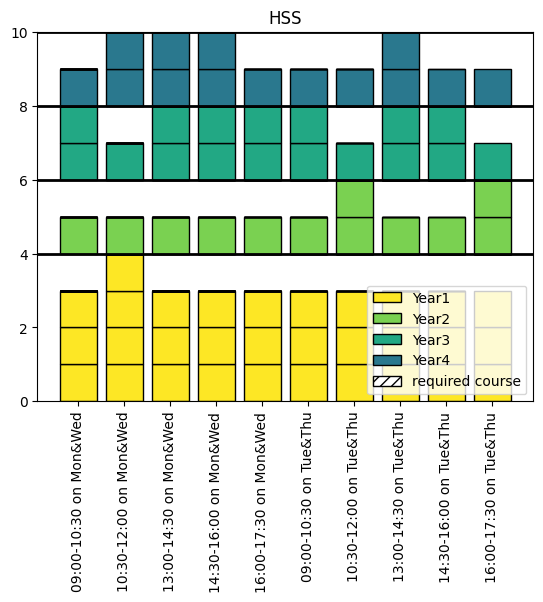

In [8]:
#@title [Code] Visualizing the result
print("Select a department to see the result.")
print("어떤 학과의 결과를 확인하시겠습니까?")
@interact(dept=selected_departments)
def histogram(dept=selected_departments):
    x = range(10)
    bottom = [0 for _ in range(10)]
    colors = ['#FDE725FF', '#7AD151FF', '#22A884FF', '#2A788EFF']
    dept_time_slot = time_slot[dept]  # Retrieve the time slots for the selected department
    dept_courses = dept_courses_dfs[dept]  # Retrieve the course data for the selected department

    required_y = [[[] for slot in range(10)] for _ in range(4)]
    elective_y = [[[] for slot in range(10)] for _ in range(4)]

    # Categorize courses into required and elective based on their course type and time slot
    for course_idx in range(dept_courses.shape[0]):
        year = int(dept_courses.iloc[course_idx]['Course No.'][3]) - 1
        slot = dept_time_slot[course_idx]
        if 'Required' in dept_courses.iloc[course_idx]['Course Type']:
            required_y[year][slot].append(course_idx)
        else:
            elective_y[year][slot].append(course_idx)

    # Plot the histogram
    for year in range(4):
        for slot in range(10):
            y = [0] * 10
            y[slot] = 1
            for course_idx in required_y[year][slot]:
                b = plt.bar(x, y, color=colors[year],
                            edgecolor='k', bottom=bottom, hatch='///')
                bottom = [bottom[i] + y[i] for i in range(10)]
            for course_idx in elective_y[year][slot]:
                b = plt.bar(x, y, color=colors[year],
                            edgecolor='k', bottom=bottom)
                bottom = [bottom[i] + y[i] for i in range(10)]

        # Set the same year at the same height
        bottom = [max(bottom) for _ in range(10)]
        plt.axhline(y=bottom[0], color='black', linewidth=2)

    # Add legend and customize the plot
    legend_patches = [Patch(facecolor=colors[year],
                            edgecolor='k',
                            label=f'Year{year + 1}') for year in range(4)]
    legend_patches.append(Patch(facecolor='white',
                                hatch='///',
                                edgecolor='k',
                                label='required course'))
    plt.legend(handles=legend_patches)
    plt.xticks(x, [idx_to_time[i] for i in range(10)], rotation=90)
    plt.title(dept)
    plt.show()


## Interpretation of the Result / 결과 해석하기

Let's analyze the result obtained by running the genetic algorithm.<br><font color="red">(The result varies every time you run the algorithm!)</font><br>
유전적 알고리즘을 실행해 얻은 결과를 분석해보겠습니다.<br><font color="red">(실행 할 때마다 결과가 달라집니다!)</font>

1. **Mathematical Sciences / 수리과학과 (MAS)**

<center><img src="https://raw.githubusercontent.com/KAIST19/CS376_project/main/MAS.png" alt="genetic_algorithm_steps" width="300px"></center><br>

It has successfully found the global maximum—this result of scheduling has the highest fitness possible. By assigning the 1st-year course and the 3rd-year course to the same time slot, it has taken into account the lower probability of a student taking courses from both those academic years. Additionally, the fitness function found it more resonable to overlap the 3rd-year courses with the required courses of the 1st-year, rather than with the 2nd-year coureses.<br>
Global maximum을 잘 찾아냈습니다 (가능한 스케줄링 결과들 중 가장 높은 적합도를 가집니다). 같은 학생이 1학년 수업과 3학년 수업을 들을 확률이 적으므로 1학년 수업과 3학년 수업을 같은 수업 시간에 할당하였습니다. 3학년 수업의 경우, 2학년 전공 선택 강의와 겹치는 것 보단 1학년 전공 필수 강의와 겹치는게 더 합리적이다고 판단했음을 확인할 수 있습니다.

2. **School of Computing / 전산학부(CS)**

<center><img src="https://raw.githubusercontent.com/KAIST19/CS376_project/main/CS.png" alt="genetic_algorithm_steps" width="300px"></center><br>

It has also successfully found the global maximum. There is no 2nd year course on the time slot where the required 1st-year course is placed. Although there are some overlaps with the 3rd-year courses due to the larger number of courses, it has managed to avoid conflicts by ensuring that none of the 2nd-year courses are included in those overlapping areas.<br>
Global maximum을 잘 찾아냈습니다. 1학년 필수 과목과 겹치는 2학년 과목이 없으며, 3학년 과목의 경우 과목 수가 많아 겹치는 부분이 있는 것은 어쩔 수 없지만 2학년 과목이 있는 부분을 모두 피해서 겹치게 하였습니다.

3. **Electrical Engineering / 전기전자공학부(EE)**

<center><img src="https://raw.githubusercontent.com/KAIST19/CS376_project/main/EE.png" alt="genetic_algorithm_steps" width="300px"></center><br>

We have almost approached the global maximum, but have not reached it sadly. The number of third-year subjects is one more than the time slots, causing unavoidable overlaps. However, we have minimized the penalty by overlapping on the days without 2nd and 4th-year courses. We can confirm that the scheduling has been done in such a way that no required courses overlap. The only 4th-year course was assigned to a time slot when there are no 2nd-year subjects. It would have reached the global maximum if the 4th-year elective course, which comes 14:30-16:00 on Tuesdays and Thursdays, was on Mondays and Wednesdays 14:30-16:00.<br>
Global maximum 근접했으나 안타깝게도 도달하진 못했습니다. 3학년 과목의 수가 강의 시간보다 하나 많아 겹치는 부분이 어쩔 수 없이 생기지만, 2학년 과목과 4학년 과목이 없는 날에 겹치게 해서 적합도를 최대화 하였습니다. 필수 과목의 경우 겹치는 경우가 하나도 없도록 스케줄링 되었음을 확인할 수 있습니다. 4학년 필수 과목의 경우 2학년 과목이 없는 시간에 배정되도록 하였습니다. 화요일, 목요일 14:30-16:00에 있는 4학년 선택 과목이 월요일, 수요일 14:30-16:00에 배저오디었다면 해당 스케줄링 결과는 global maximum이었을 것입니다.

# Conclusion / 결론

Through scheduling undergraduate courses at KAIST using a genetic algorithm, we have explored how the algorithm works. Unlike other complex and time-consuming deterministic algorithms, the genetic algorithm has the advantage of automatically scheduling courses well by considering only the "fitness" factor. It can also take into account the nature of required/elective courses and recommended academic years through fitness evaluation, making it a useful algorithm for scheduling KAIST courses.<br>
유전 알고리즘을 사용해 KAIST의 학부 강의를 스케줄링해보며 알고리즘이 어떻게 작동하는지를 살펴보았습니다. 복잡하면서도 시간이 오래 걸리는 다른 deterministic한 알고리즘과 다르게 ***적합도***만 잘 고려하면 유전 알고리즘이 알아서 스케줄링을 잘 한다는 장점이 있으며, 필수/선택 과목 여부나 권장 수강 학년 또한 적합도를 통해 반영할 수 있기에 KAIST 강의를 스케줄링 하는데 매유 유용한 알고리즘입니다.

## Reflection / 느낀점
Initially, when I started writing this report, it seemed that humans would be better at this job in terms of speed and scheduling quality. However, with the addition of ad hoc procedures and appropriate optimizations, I was able to achieve optimized scheduling in a much shorter time than a human and with higher quality.<br>
처음에 보고서 작성을 시작할 땐 사람이 직접 하는게 더 나을 만큼 느리고 스케줄링 퀄리티도 좋지 않았지만, ad hoc 추가와 적절한 최적화를 통해 빠른 시간 내에 인간보다 훨씬 빠른 속도로 최적화된 스케줄링이 가능하게 되었습니다.

Possible future improvements may include:
앞으로 가능한 발전 사항으로:

1. Improving the fitness function based on more various course types such as basic, major, and humanities.<br>기초/전공/교양 등 더 다양한 강의 종류에 기반해 policy를 더 세분화 하고,
2. Considering the correlation between courses in different departments based on statistics of students pursuing minors or double majors.<br>부전공/복수전공을 하는 학생 수 통계를 기반으로 다른 학과의 강의들 간 상관관계도 고려하며,
3. Adding more diverse mutations in the ad hoc section for exploration.<br>ad hoc 부분에 조금 더 다양한 돌연변이들을 추가하여 탐색할 수 있도록 하기.

If these improvements are implemented, we can probably achieve a level where the algorithm can be practically utilized with a high degree of reliability. This algorithm can also possibly schedule the exam schedules with different time slots and conditions. <br>
정도가 있겠으며, 만약 구현 된다면 실제로 사용할 수 있을 정도의 수준을 갖출 수 있을 것입니다. 또한, 다른 시간 슬롯과 조건들을 적용하여 중간, 기말 고사 일정을 스케줄링하는 알고리즘으로도 사용될 수 있을 것입니다.